In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
from plotly.subplots import make_subplots
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [2]:
data = pd.read_csv("data.csv")
data.head()

name        artist                             track_URI  \
0  ...Ready For It?  Taylor Swift  spotify:track:7zgqtptZvhf8GEmdsM2vp2   
1      Life Changes  Thomas Rhett  spotify:track:4Vxu50qVrQcycjRyJQaZLC   
2         24K Magic    Bruno Mars  spotify:track:6b8Be6ljOzmkOmFslEb23P   
3       Galway Girl    Ed Sheeran  spotify:track:0afhq8XCExXpqazXczTSve   
4        Photograph    Ed Sheeran  spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0665         0.615   0.779          0.000000    0.1550    -6.454   
1        0.1000         0.687   0.845          0.000000    0.0452    -4.370   
2        0.0340         0.818   0.803          0.000000    0.1530    -4.282   
3        0.0735         0.624   0.876          0.000000    0.3270    -3.374   
4        0.6070         0.614   0.379          0.000464    0.0986   -10.480   

   speechiness    tempo  valence                                     playlist  
0       0.1350  160.000    0.453  The Longest Playlist on Spotify® (Official)  
1       0.0576   87.972    0.809  The Longest Playlist on Spotify® (Official)  
2       0.0797  106.970    0.632  The Longest Playlist on Spotify® (Official)  
3       0.1000   99.943    0.781  The Longest Playlist on Spotify® (Official)  
4       0.0476  107.989    0.201  The Longest Playlist on Spotify® (Official)

In [44]:
data.shape

(12138, 13)

In [45]:
data.isna().sum()

name                2
artist              2
track_URI           0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
playlist            0
dtype: int64

In [139]:
for i in data['track_URI'].value_counts():
    if i!=1:
        print(i)

In [47]:
data['artist'].value_counts()

Taylor Swift         155
Lacuna Coil           73
Charlie Brown         70
The Neighbourhood     65
Flyleaf               54
                    ... 
Phantogram             1
Eric Amarillo          1
James Hersey           1
Dawa                   1
girl in red            1
Name: artist, Length: 4111, dtype: int64

In [140]:
data.describe()

acousticness  danceability        energy  instrumentalness  \
count  12138.000000  12138.000000  12138.000000      12138.000000   
mean       0.249016      0.567235      0.645816          0.105665   
std        0.299363      0.163812      0.232343          0.254477   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.014100      0.465000      0.489000          0.000000   
50%        0.101000      0.579000      0.691000          0.000046   
75%        0.419000      0.686000      0.832000          0.011400   
max        0.995000      0.980000      1.000000          0.999000   

           liveness      loudness   speechiness         tempo       valence  
count  12138.000000  12138.000000  12138.000000  12138.000000  12138.000000  
mean       0.186278     -7.794664      0.068722    120.496019      0.461992  
std        0.155873      4.419630      0.072007     28.049141      0.246406  
min        0.000000    -53.436000      0.000000      0.000000      0.000000  
25%        0.095000     -9.347750      0.034100     99.979000      0.264000  
50%        0.122000     -6.631000      0.044200    119.998500      0.451000  
75%        0.227000     -4.921000      0.069700    137.911750      0.655000  
max        0.988000     -0.276000      0.957000    240.107000      0.990000

C:\Users\prana\AppData\Local\Temp\ipykernel_28332\1917817957.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  g = sns.heatmap(data.corr(), cmap = sns.diverging_palette(220, 20, as_cmap=True))


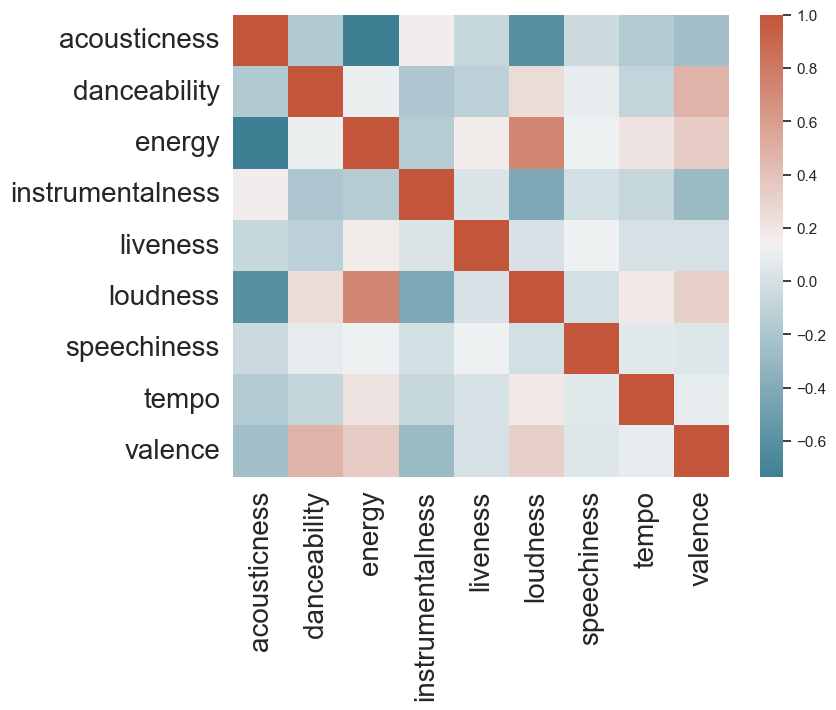

In [13]:
sns.set(rc={'figure.figsize':(8,6)})
g = sns.heatmap(data.corr(), cmap = sns.diverging_palette(220, 20, as_cmap=True))
g.set_xticklabels(data.columns[3:-1],rotation=90,fontsize=20)
g.set_yticklabels(data.columns[3:-1],fontsize=20)
g.figure.savefig("visualizations/heatmap.png", bbox_inches="tight")
# Show the plot
plt.show()

- The above heat map shows how strongly different numerical data correlates. The deep red shows strong positive relationships and the deep blue shows strong negative relationships. Some interesting correlations deserve a few comments.

- In another unsurprising trend, loudness correlates with energy. Intuitively, high energy songs radiate intensity, which often comes with loudness.

- Acousticness shares a few interesting negative relationships. Its inverse relationship with energy and loudness captures the idea of how most people image ballads.


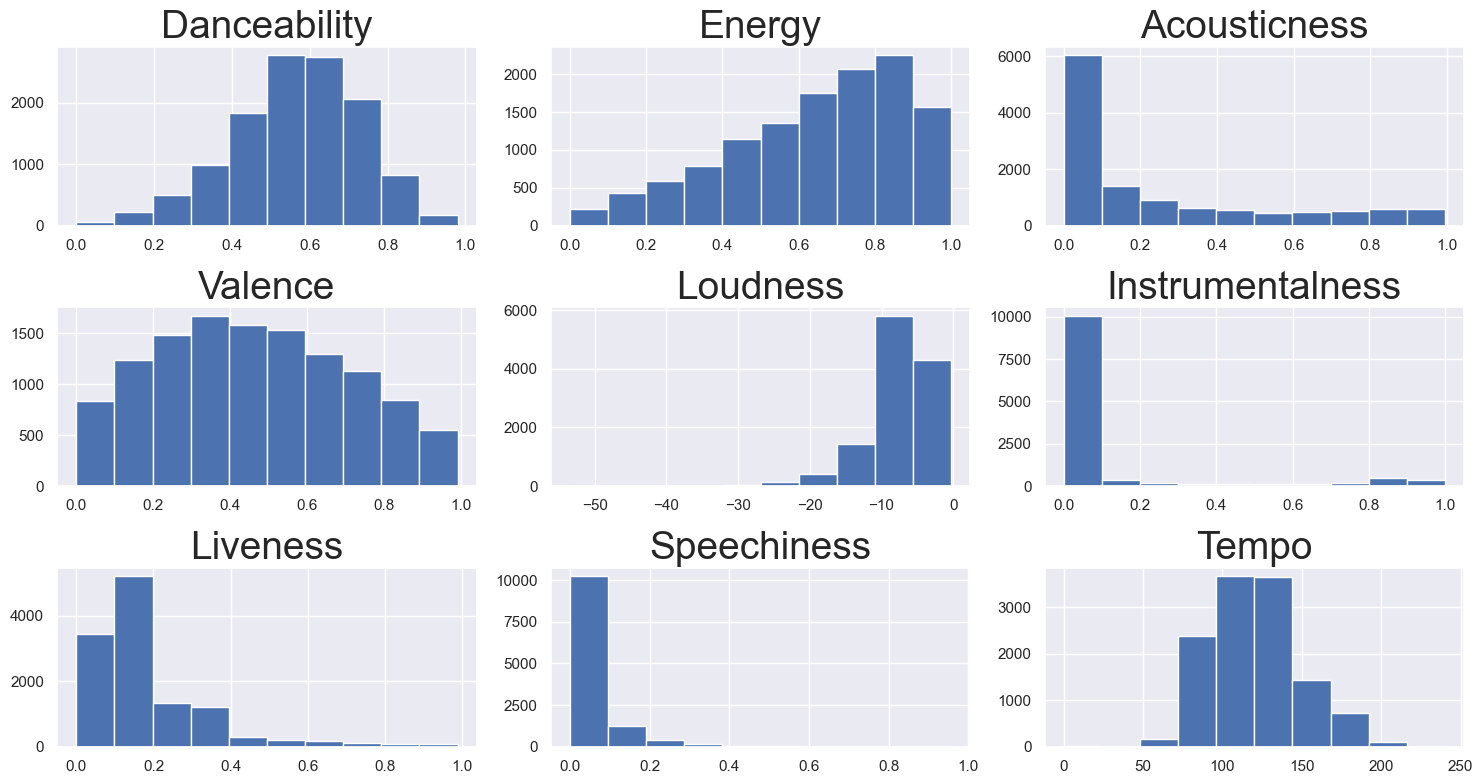

In [15]:

fig,axes = plt.subplots(3,3,figsize=(15,8))

axes[0,0].hist(data['danceability'])
axes[0,0].set_title('Danceability',fontsize=28)
axes[0,1].hist(data['energy'])
axes[0,1].set_title('Energy',fontsize=28)
axes[0,2].hist(data['acousticness'])
axes[0,2].set_title('Acousticness',fontsize=28)
axes[1,0].hist(data['valence'])
axes[1,0].set_title('Valence',fontsize=28)
axes[1,1].hist(data['loudness'])
axes[1,1].set_title('Loudness',fontsize=28)
axes[1,2].hist(data['instrumentalness'])
axes[1,2].set_title("Instrumentalness",fontsize=28)
axes[2,0].hist(data['liveness'])
axes[2,0].set_title("Liveness",fontsize=28)
axes[2,1].hist(data['speechiness'])
axes[2,1].set_title("Speechiness",fontsize=28)
axes[2,2].hist(data['tempo'])
axes[2,2].set_title("Tempo",fontsize=28)
plt.tight_layout()
plt.savefig("visualizations/distribution.png")
plt.show()


In [17]:
normalized = StandardScaler().fit_transform(data[data.columns[3:-1]])
normalized_data = pd.DataFrame(normalized, index=data.index, columns = data.columns[3:-1])
normalized_data.head()

acousticness  danceability    energy  instrumentalness  liveness  loudness  \
0     -0.609706      0.291597  0.573244         -0.415243 -0.200670  0.303356   
1     -0.497797      0.731142  0.857317         -0.415243 -0.905117  0.774908   
2     -0.718275      1.530870  0.676543         -0.415243 -0.213502  0.794820   
3     -0.586322      0.346540  0.990746         -0.415243  0.902834  1.000275   
4      1.195870      0.285492 -1.148416         -0.413420 -0.562517 -0.607618   

   speechiness     tempo   valence  
0     0.920475  1.408443 -0.036494  
1    -0.154466 -1.159585  1.408333  
2     0.152461 -0.482246  0.689978  
3     0.434390 -0.732781  1.294695  
4    -0.293348 -0.445915 -1.059237

In [18]:
normalized_data.describe()

acousticness  danceability        energy  instrumentalness  \
count  1.213800e+04  1.213800e+04  1.213800e+04      1.213800e+04   
mean  -1.404929e-17 -2.809858e-16 -2.060562e-16      1.873238e-17   
std    1.000041e+00  1.000041e+00  1.000041e+00      1.000041e+00   
min   -8.318537e-01 -3.462850e+00 -2.779689e+00     -4.152432e-01   
25%   -7.847518e-01 -6.241217e-01 -6.749599e-01     -4.152432e-01   
50%   -4.944566e-01  7.182471e-02  1.944784e-01     -4.150632e-01   
75%    5.678432e-01  7.250375e-01  8.013635e-01     -3.704436e-01   
max    2.492009e+00  2.519847e+00  1.524461e+00      3.510617e+00   

           liveness      loudness   speechiness         tempo       valence  
count  1.213800e+04  1.213800e+04  1.213800e+04  1.213800e+04  1.213800e+04  
mean  -2.809858e-17  2.809858e-16 -2.341548e-17 -6.088025e-17 -1.873238e-17  
std    1.000041e+00  1.000041e+00  1.000041e+00  1.000041e+00  1.000041e+00  
min   -1.195107e+00 -1.032738e+01 -9.544224e-01 -4.296067e+00 -1.874996e+00  
25%   -5.856136e-01 -3.514207e-01 -4.808373e-01 -7.314971e-01 -8.035511e-01  
50%   -4.123891e-01  2.633053e-01 -3.405672e-01 -1.773813e-02 -4.461092e-02  
75%    2.612620e-01  6.502315e-01  1.358000e-02  6.209263e-01  7.833239e-01  
max    5.143628e+00  1.701268e+00  1.233651e+01  4.264512e+00  2.142923e+00

Order of Features according to variance (highest to lowest) => Acousticness, instrumentalness, valence, energy, danceability, liveness, tempo, loudness, speechiness

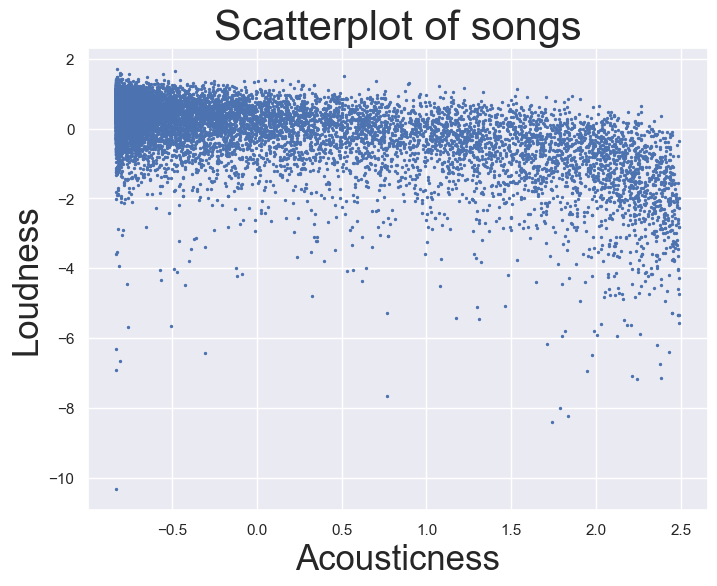

In [24]:
plt.scatter(dfp['acousticness'],dfp['loudness'],s=2)
plt.xlabel("Acousticness",fontsize=25)
plt.ylabel("Loudness",fontsize=25)
plt.title("Scatterplot of songs", fontsize=30)
plt.savefig("visualizations/2d_scatter_1.png")

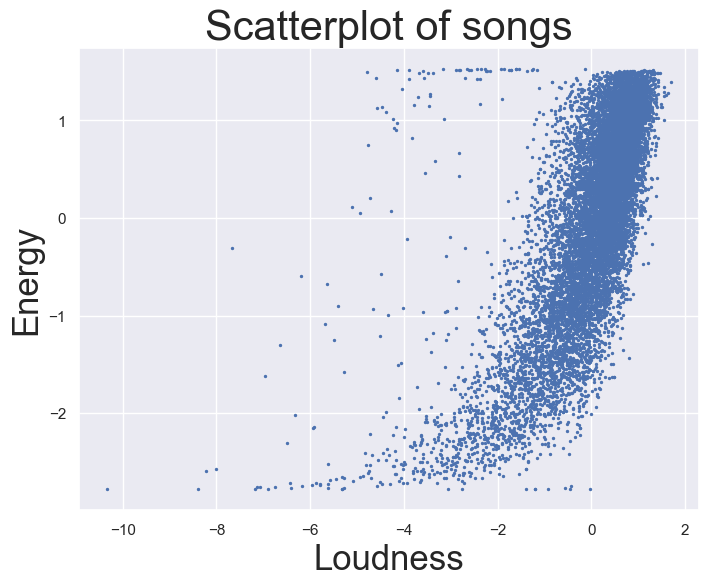

In [25]:
plt.scatter(dfp['loudness'],dfp['energy'],s=2)
plt.xlabel("Loudness",fontsize=25)
plt.ylabel("Energy",fontsize=25)
plt.title("Scatterplot of songs",fontsize=30)
plt.savefig("visualizations/2d_scatter_2.png")

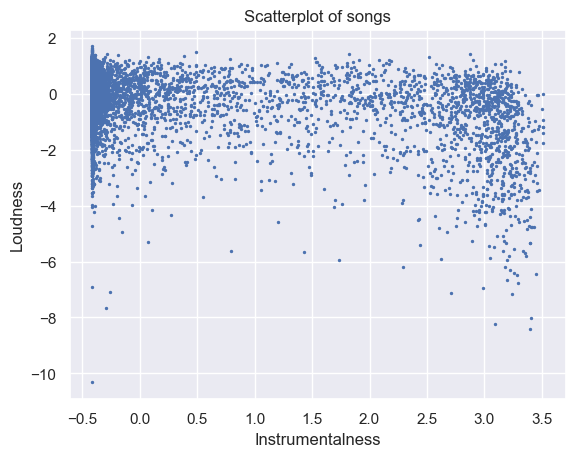

In [38]:
plt.scatter(dfp['instrumentalness'],dfp['loudness'],s=2)
plt.xlabel("Instrumentalness")
plt.ylabel("Loudness")
plt.title("Scatterplot of songs")
plt.savefig("visualizations/2d_scatter_3.png")

In [34]:
def plot_3d(x,y,z,x_label,y_label,z_label):
    plt.tight_layout()
    fig = plt.figure(figsize=(8,8))
    
    ax = fig.add_subplot(111,projection='3d')
    ax.scatter(x,y,z,s=2)
    ax.set_xlabel(x_label,fontsize=20)
    ax.set_ylabel(y_label,fontsize=20)
    ax.set_zlabel(z_label,fontsize=20)
#     ax.set_title("3D Scatter Plot of Songs")
    plt.savefig("visualizations/"+x_label+"-"+y_label+"-"+z_label+".png")

In [19]:
dfp = normalized_data.copy()
plot_3d(dfp['loudness'],dfp['energy'],dfp['danceability'],"Loudness","Energy","Danceability")

NameError: name 'plot_3d' is not defined

<Figure size 640x480 with 0 Axes>

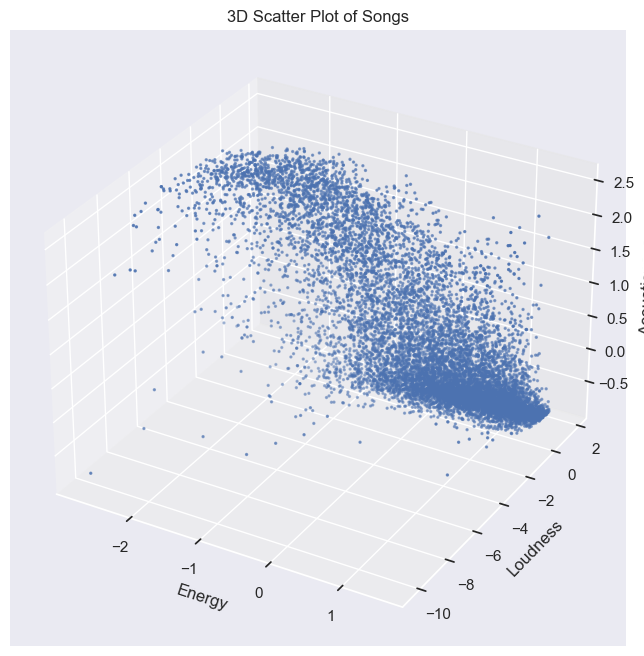

In [44]:
plot_3d(dfp['energy'],dfp['loudness'],dfp['acousticness'],"Energy","Loudness","Acousticness")

<Figure size 800x600 with 0 Axes>

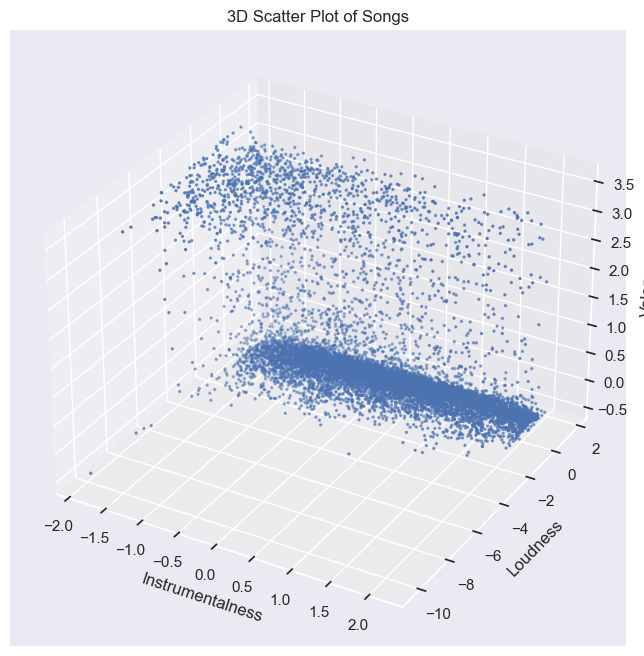

In [28]:
plot_3d(dfp['valence'],dfp['loudness'],dfp['instrumentalness'],"Instrumentalness","Loudness","Valence")

<Figure size 800x600 with 0 Axes>

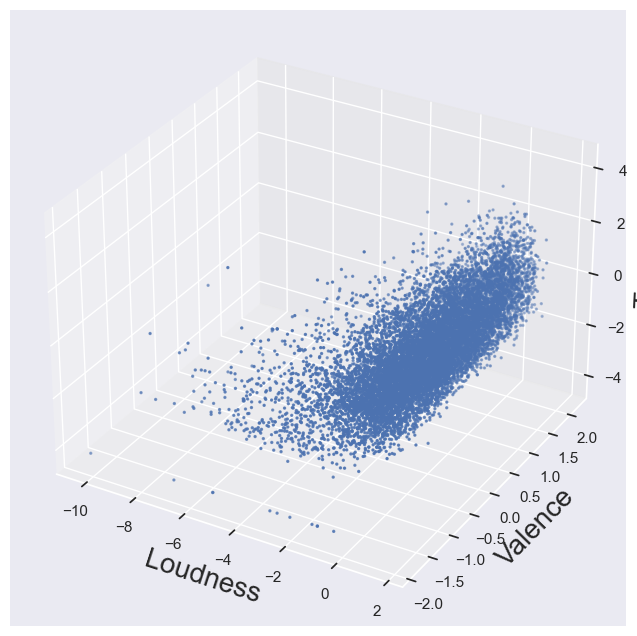

In [35]:
plot_3d(dfp['loudness'],dfp['valence'],dfp['tempo'],"Loudness","Valence","Tempo")

<Figure size 800x550 with 0 Axes>

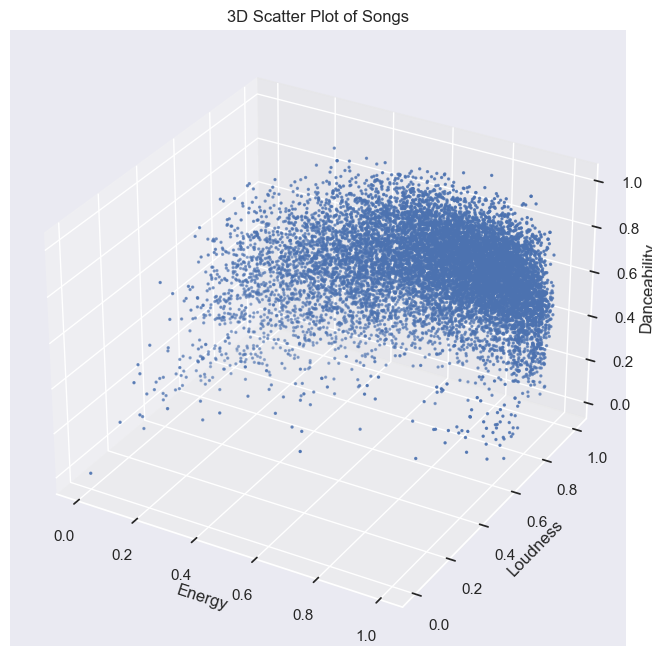

In [113]:
plot_3d(dfp['energy'],dfp['loudness'],dfp['danceability'],"Energy","Loudness","Danceability")

<Figure size 800x550 with 0 Axes>

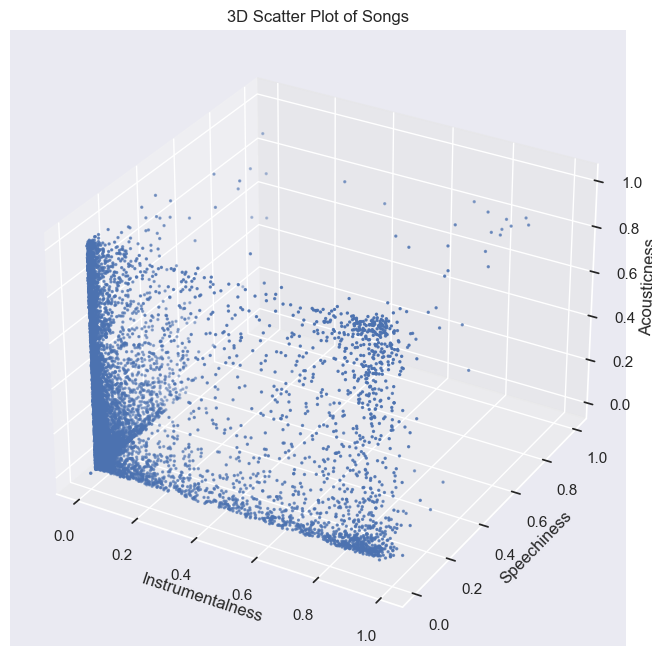

In [114]:
plot_3d(dfp['instrumentalness'],dfp['speechiness'],dfp['acousticness'],"Instrumentalness","Speechiness","Acousticness")

In [51]:
col_features = data.columns[3:-2]
X = StandardScaler().fit_transform(data[col_features])

In [52]:

kmeans = KMeans(init="k-means++",n_clusters=3,random_state=15).fit(X)

In [53]:
data['kmeans'] = kmeans.labels_


In [57]:
def plot_3d_cluster(x,y,z,xla,yla,zla):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111,projection='3d')

    cmhot = cmhot = plt.get_cmap('bwr')

    ax.scatter(x,y,z,c=data['kmeans'],s=5,cmap=cmhot)
    ax.set_xlabel(xla,fontsize=12)
    ax.set_ylabel(yla,fontsize=12)
    ax.set_zlabel(zla,fontsize=12)
    ax.set_title("3D Scatter Plot of Songs Clustered")
    plt.savefig("visualizations/3d-cluster-"+xla+"-"+yla+"-"+zla+".png")



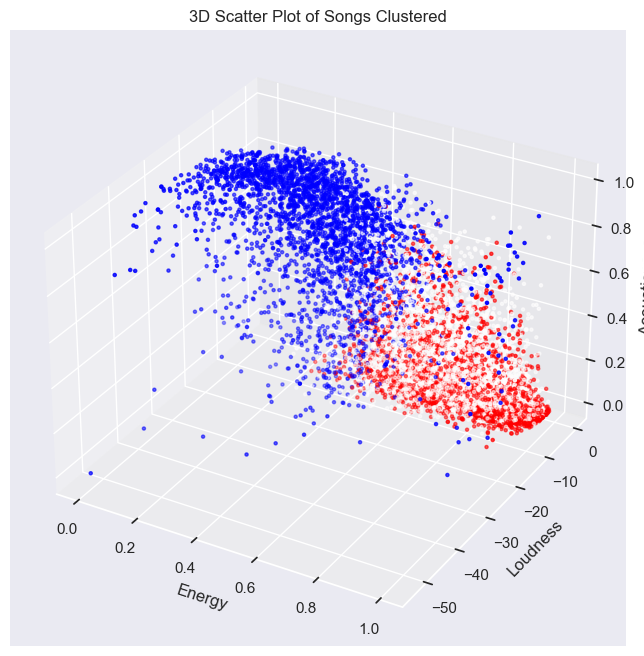

In [58]:
plot_3d_cluster(data['energy'],data['loudness'],data['acousticness'],"Energy",'Loudness','Acousticness')

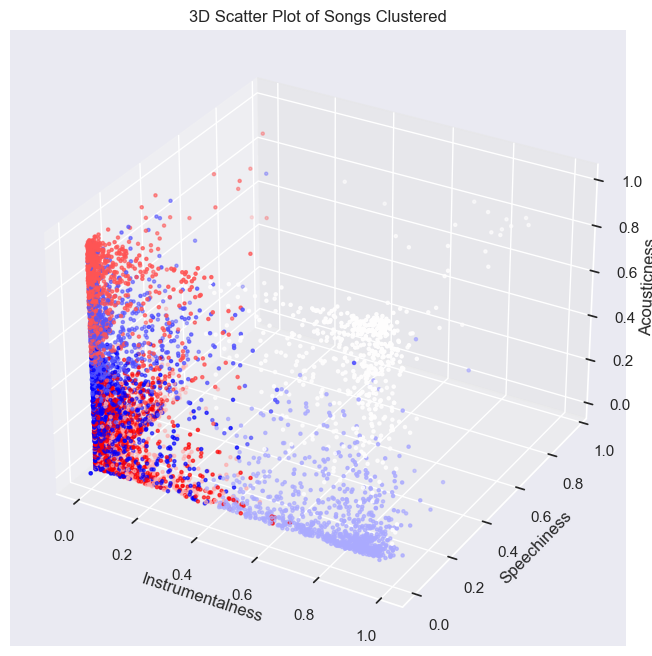

In [129]:
plot_3d_cluster(data['instrumentalness'],data['speechiness'],data['acousticness'],"Instrumentalness","Speechiness","Acousticness")

In [38]:
def make_normalized_df(df, col_sep):
    non_features = df[df.columns[:col_sep]]
    features = df[df.columns[col_sep:]]
    norm = MinMaxScaler().fit_transform(features)
    scaled = pd.DataFrame(norm, index=df.index, columns = df.columns[col_sep:])
    return pd.concat([non_features, scaled], axis=1)

cluster_labels = data['kmeans']
orig = data.drop(columns=['playlist', 'kmeans'])
values_df = make_normalized_df(orig, 3)
values_df.insert(3, 'cluster', cluster_labels)
values_df.head()

name        artist                             track_URI  \
0  ...Ready For It?  Taylor Swift  spotify:track:7zgqtptZvhf8GEmdsM2vp2   
1      Life Changes  Thomas Rhett  spotify:track:4Vxu50qVrQcycjRyJQaZLC   
2         24K Magic    Bruno Mars  spotify:track:6b8Be6ljOzmkOmFslEb23P   
3       Galway Girl    Ed Sheeran  spotify:track:0afhq8XCExXpqazXczTSve   
4        Photograph    Ed Sheeran  spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL   

   cluster  acousticness  danceability  energy  instrumentalness  liveness  \
0        4      0.066834      0.627551   0.779          0.000000  0.156883   
1        6      0.100503      0.701020   0.845          0.000000  0.045749   
2        6      0.034171      0.834694   0.803          0.000000  0.154858   
3        6      0.073869      0.636735   0.876          0.000000  0.330972   
4        5      0.610050      0.626531   0.379          0.000464  0.099798   

   loudness  speechiness     tempo   valence  
0  0.883785     0.141066  0.666370  0.457576  
1  0.922987     0.060188  0.366387  0.817172  
2  0.924643     0.083281  0.445510  0.638384  
3  0.941723     0.104493  0.416244  0.788889  
4  0.808051     0.049739  0.449754  0.203030

In [40]:
n_clusters = 7
fig = make_subplots(rows=2, cols=4, specs=[[{'type': 'polar'}]*4]*2)

angles = list(values_df.columns[4:])
angles.append(angles[0])

'''
A - Acousticness
D - Danceability
E - Energy
I - Instrumentalness
Li - Liveness
Lo - Loudness
S - Speechiness
T - Tempo
V - Valence
'''
abbrev = ["A", "D", "E", "I", "Li", "Lo", "S", "T", "V"]

layoutdict = dict(
            radialaxis=dict(
            visible=True,
            range=[0, 1]
            ))

for i in range(n_clusters):
    subset = values_df[values_df['cluster'] == i]
    data = [np.mean(subset[col]) for col in subset.columns[4:]]
    data.append(data[0])
    fig.add_trace(go.Scatterpolar(
        r=data,
        theta=abbrev,
        fill='toself',
        name="Cluster " + str(i)),
        i // 4 + 1,
        i % 4 + 1)
    
fig.update_layout(
        polar=layoutdict,
        polar2=layoutdict,
        polar3=layoutdict,
        polar4=layoutdict,
        polar5=layoutdict,
        polar6=layoutdict,
        polar7=layoutdict,
        polar8=layoutdict,
        showlegend=True
        )
fig.show()
#     fig.write_image('./visualizations/cluster' + str(i) + '.png')

In [24]:
fig = go.Figure()

angles = list(values_df.columns[4:])
angles.append(angles[0])

layoutdict = dict(
            radialaxis=dict(
            visible=True,
            range=[0, 1]
            ))

for i in range(n_clusters):
    subset = values_df[values_df['cluster'] == i]
    data = [np.mean(subset[col]) for col in subset.columns[4:]]
    data.append(data[0])
    fig.add_trace(go.Scatterpolar(
        r=data,
        theta=angles,
        fill='toself',
        name="Cluster " + str(i)))
    
fig.update_layout(
        polar=layoutdict,
        showlegend=True
        )
fig.show()
#     fig.write_image('./visualizations/cluster' + str(i) + '.png')

In [28]:
preview = df.loc[df['Cluster'] == 0]
print(len(preview))
preview.head(n=50)

2246


name  \
4                                           Photograph   
6                                  When I Was Your Man   
24                                        Free Fallin'   
52         Teardrops On My Guitar - Radio Single Remix   
53                                           All of Me   
54                                          Let Her Go   
55                                        Stay With Me   
56                                          The A Team   
60                                             Perfect   
75                                        The Long Way   
78                                            Marry Me   
87                                       Wrecking Ball   
102                    Sweet Caroline - Single Version   
106                                             Ho Hey   
118                                      Say Something   
122                                       Free Fallin'   
130                    Dixieland Delight - Single Edit   
134                                        Count on Me   
141                               Say You Won't Let Go   
142                                          I'm Yours   
155  I Am A Man Of Constant Sorrow - From “O Brothe...   
156  I'll Fly Away - From “O Brother, Where Art Tho...   
167                                             Elvira   
169                                        Wagon Wheel   
182   I Don’t Wanna Live Forever (Fifty Shades Darker)   
183                                         The A Team   
191                                       Stay With Me   
195         Empire State of Mind (Part II) Broken Down   
197                                         Drift Away   
204                                  Hey There Delilah   
210                                             Africa   
222                                            Purpose   
226                                       Home To Mama   
232                                            Purpose   
237                               Life Is Worth Living   
244                                      Mark My Words   
250                                       Tainted Love   
266                                     Sweet Caroline   
292                                      Wrecking Ball   
314                                    Die A Happy Man   
346                                    Humble And Kind   
359                              Blue Ain't Your Color   
382                                          Fireproof   
389                      More Than You Know - Acoustic   
393                 This Town (feat. Sasha Alex Sloan)   
438                                     No Fixed Abode   
446  No Promises (feat. Demi Lovato) - Stripped Ver...   
451                                     Turn Back Time   
454                                          Waterfall   
458                               Too Good At Goodbyes   

                     artist                             track_URI  \
4                Ed Sheeran  spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL   
6                Bruno Mars  spotify:track:0nJW01T7XtvILxQgC5J7Wh   
24                Tom Petty  spotify:track:5tVA6TkbaAH9QMITTQRrNv   
52             Taylor Swift  spotify:track:7zMcNqs55Mxer82bvZFkpg   
53              John Legend  spotify:track:3U4isOIWM3VvDubwSI3y7a   
54                Passenger  spotify:track:6GmUVqe73u5YRfUUynZK6I   
55                Sam Smith  spotify:track:5Db9VIdDsN5yu3Eu7CT0i4   
56               Ed Sheeran  spotify:track:1VdZ0vKfR5jneCmWIUAMxK   
60               Ed Sheeran  spotify:track:0tgVpDi06FyKpA1z0VMD4v   
75           Brett Eldredge  spotify:track:1KTLLe980WR4RLKg74Ud6e   
78             Thomas Rhett  spotify:track:0OWZFobGSIW9GrSlQ9C5pc   
87              Miley Cyrus  spotify:track:2vwlzO0Qp8kfEtzTsCXfyE   
102            Neil Diamond  spotify:track:6l7tK5SsMlN8a9ccgeIkpS   
106           The Lumineers  spotify:track:2nXM8IVqKtyO6JKsLlXWAy   
118       A Great Big World  spotify:track:6Vc5wAMmXdKIA